In [ ]:
#for Atul
import tweepy
consumer_key = "phDphxJphqdy1z6p4Ro9nXOws"
consumer_secret = "AA9tzpkDxh6zLsgyz5bSHbLi5412uFYhct26cBBAFXsauPAXQP"
access_token = "1077797923272810496-zdTr9xhZd1j7pOFEtL2wMQZhfWSmyr"
access_token_secret = "Jrm6xp6iEi1VSUD9cd6LXQU34lGu8N7v5aPVpNfjUqzim"

In [1]:
#for sandeep
consumer_key = "X9OBSOJTdVFm7JmLXmRXnELMA"
consumer_secret = "kP2AtlyPTP3B5sBMrZU0d3PcDY681yvH6TcnJUIoh2xRM742ZU"
access_token = "3149540395-Ul3fM3MPS8aaKnUCWWpMDZOkZ0nXxxl5fK17eMT"
access_token_secret = "PBwRg4QzVjnjYxo9u8BedNCyNTDEYEZrWiAoDy4S3SiSG"

In [2]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [4]:
#ByKeyword
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "iphonex"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language,count=2000)

print(results)

[Status(_api=<tweepy.api.API object at 0x000001C8A0A00978>, _json={'created_at': 'Wed Dec 26 07:58:38 +0000 2018', 'id': 1077836068337127424, 'id_str': '1077836068337127424', 'text': 'Got a new iPhoneX from @amazon india. Opened phone and find it not working. Apple service says amazon not authorize… https://t.co/mm02obMRdb', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'amazon', 'name': 'Amazon.com', 'id': 20793816, 'id_str': '20793816', 'indices': [23, 30]}], 'urls': [{'url': 'https://t.co/mm02obMRdb', 'expanded_url': 'https://twitter.com/i/web/status/1077836068337127424', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_r

In [5]:
# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print (tweet.user.screen_name,"Tweeted:",tweet.text,tweet.created_at)

rahulguptaiitr Tweeted: Got a new iPhoneX from @amazon india. Opened phone and find it not working. Apple service says amazon not authorize… https://t.co/mm02obMRdb 2018-12-26 07:58:38
nillkool9 Tweeted: New Emojis with New update 
🥰🥳🥵🥶🥴🦶🦵🦷
🧒🏻👩🏻‍🦱👨🏻‍🦱👩‍🦰👨‍🦰👱🏻‍♂️👩‍🦳👨‍🦳👩🏻‍🦲👨‍🦲🧓🧕🦸‍♀️🦸‍♂️🦹‍♀️🦹‍♂️🧙‍♀️🧙‍♂️🧖‍♀️🧖‍♂️🧶🧵💼🎒🧳👝👜👛🥽🌂… https://t.co/YUGdEFZsy3 2018-12-26 07:55:24
Video_Forensics Tweeted: Do all new iPhones suffer from a hardware design flaw? It sure seems like it  https://t.co/BczsRmIqbV  #iPhone… https://t.co/iT21jDSOoX 2018-12-26 07:55:06
El_Salams Tweeted: RT @VIVID_KAAH: @uncle_shamsu @chemicalbrodar @Meeiynalicious @RilwanNajib @Alex_Houseof308 @ObongRoviel @Mahmud_a_laushi @lovelymuslimah_… 2018-12-26 07:51:13
khadijah__Aliyu Tweeted: RT @VIVID_KAAH: @uncle_shamsu @chemicalbrodar @Meeiynalicious @RilwanNajib @Alex_Houseof308 @ObongRoviel @Mahmud_a_laushi @lovelymuslimah_… 2018-12-26 07:46:20
Chidoripillz Tweeted: RT @VIVID_KAAH: @uncle_shamsu @chemicalbrodar @Meeiynalicious @Rilwa

Facing lot of issues in pulling data from twitter. earlier they did not provide us keys and then once we have provided isb id we got the keys. so we have decided to go ahead with kaggle data first. we will also use already pulled twitter data along with this kaggle data.

Data from kaggle https://www.kaggle.com/kewalkishang/iphonexreview
Data understanding

In [13]:
comments_list = pd.read_csv(r'C:\Users\sasing\OneDrive - Adobe Systems Incorporated\ISB\CBA\Term1\Practicum\IPhoneReview.csv',encoding='latin-1')

In [14]:
len(comments_list)

2000

In [15]:
# Three sample comments
comments_list[:3]

,Unnamed: 0,Date,Review,UserName
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous


Data summary and understanding to create a model on review data so we could find a better perspective on our test data pulled from twitter and kaggle

Here is the subset of unlocked phone data from Amazon. Original kaggle data contains more than 400K rows so we have pulled only small subset which seems to be more relevant for our analysis

In [35]:
#Data Prep for Sentiment Analysis
import pandas as pd
import numpy as np

# Read in the data
df1 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/Amazon_Unlocked_Mobile_Reviews1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/Amazon_Unlocked_Mobile_Reviews2.csv')

df=pd.concat([df1,df2],ignore_index=True)


df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,"Exactly what I wanted, fast shipping.",0.0
1,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,I was a little skeptical about buying electron...,1.0
2,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0
3,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,The sexy body of a 5s and the guts of a 6........,0.0
4,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,Love it!,0.0


In [36]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,"Exactly what I wanted, fast shipping.",0.0,1
1,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,I was a little skeptical about buying electron...,1.0,1
2,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,1,"Phone was not what I ordered, very disappointe...",1.0,0
3,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,The sexy body of a 5s and the guts of a 6........,0.0,1
4,Apple iPhone SE Unlocked Phone - 64 GB Retail ...,Apple,514.98,5,Love it!,0.0,1


In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'],random_state=3)

#### Bags-of-words
We will use bag of words method to find out frequency of each word in the whole structure. CountVectorizer provides us tokens based on text data we have provided

let's use CountVectorizer and fit it to our training data, converting our collection of text documents into a matrix of token counts and find the total length

In [38]:
#CountVectorizer, n-grams

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

103120

Based on feature matrix X_ train_ vectorized we train the Logistic Regression classifier because Logistics Regression works well for high dimensional sparse data.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('ROC_AUC: ', roc_auc_score(y_test, predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC_AUC:  0.9691770584144657


Results are really good. Now we will use coefficients for each word to understand positivity and negativity. we will also sort to find out first 10 worst and best words

In [40]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'worst' 'poor' 'looks ok' 'not good' 'horrible'
 'terrible' 'not happy' 'not very']

Largest Coefs: 
['excellent' 'excelent' 'excelente' 'not bad' 'no problems' 'perfect'
 'awesome' 'exelente' 'great' 'amazing']


In [41]:
# check the model to see if it correctly identifies a positive review
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [42]:
#Sentiment Analysis for iPhone X
comments_positivity = model.predict(vect.transform(comments_list))
print(comments_positivity)

[1 1 1 1 1 1]


In [43]:
comments_positivity.mean()

1.0

Now as we can see that our model is working properly with review data and we see positive sentiment about iphone x we will plot a cloud to find out common words used with iphone

In [44]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
df = comments_list

In [45]:
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.Review:
      # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens:
            comment_words = comment_words + words + ' '

  


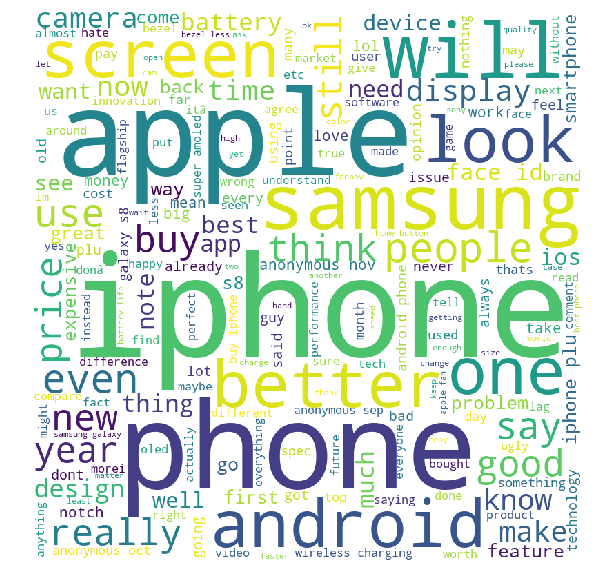

In [46]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [48]:
df.head()

,Unnamed: 0,Date,Review,UserName,sentiment,sentiment1
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No,"(0.21666666666666667, 0.43333333333333335)",NaN
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous,"(0.0, 0.0)",NaN
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous,"(-0.4, 0.7)",NaN
3,3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony,"(-0.2, 0.85)",NaN
4,4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous,"(0.175, 0.85)",NaN


Checking sentiment of our own small data for sentiment through textblob (text analytics class)

In [49]:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize

In [50]:
review = df.Review.astype(str)
review.head()

0    mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...
1    This month it fell from 1149Â? to 999Â? in Ger...
2    chopp, 16 Jan 2018hey guys iam confused betwee...
3    chopp, 16 Jan 2018hey guys iam confused betwee...
4    hey guys iam confused between buying iphone x ...
Name: Review, dtype: object

In [72]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment[0]
    except:
        return None

df['sentiment'] = df['Review'].apply(sentiment_calc)

In [73]:
df.head()

,Unnamed: 0,Date,Review,UserName,sentiment
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No,0.216667
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous,0.000000
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous,-0.400000
3,3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony,-0.200000
4,4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous,0.175000


In [68]:
dfs = df['Review'].to_string()

In [71]:
dfs

'0       mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...\n1       This month it fell from 1149Â? to 999Â? in Ger...\n2       chopp, 16 Jan 2018hey guys iam confused betwee...\n3       chopp, 16 Jan 2018hey guys iam confused betwee...\n4       hey guys iam confused between buying iphone x ...\n5       mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...\n6       kavorka1, 11 Jan 2018Does anyone have battery ...\n7       My Huawei Mate 10 Pro is already two weeks old...\n8                                     How about face id? \n9       no high resolution audio in i phone x.. no fin...\n10      Anonymous, 13 Jan 2018I don\'t like Apple is no...\n11                 Mashroor, 13 Jan 2018yeah .. sameYeah \n12        I think has loads issues, go S8 it\'s bewdifulz \n13      I no buy from company that slow down battery c...\n14      Anonymous, 14 Jan 2018How can it be non-custom...\n15      Anonymous, 13 Jan 2018I don\'t like Apple is no...\n16      I don\'t like Apple is non customisable tryi

In [74]:
dfm = df.sentiment.mean()

In [75]:
dfm

0.13182343359862334

In [113]:
def sentiment_type(i):
    try:
        if i > 0:
            return 'positive'
        elif i < 0:
            return 'negative'
        else:
            return 'neutral'
    except:
        return None

df['sentiment1'] = df['sentiment'].apply(sentiment_type)

In [114]:
df.head()

,Unnamed: 0,Date,Review,UserName,sentiment,sentiment1
0,0,16 Jan 2018,"mir, 16 Jan 2018My Huawei Mate 10 Pro is alrea...",Mr No,0.216667,positive
1,1,16 Jan 2018,This month it fell from 1149Â? to 999Â? in Ger...,Anonymous,0.000000,neutral
2,2,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Anonymous,-0.400000,negative
3,3,16 Jan 2018,"chopp, 16 Jan 2018hey guys iam confused betwee...",Tony,-0.200000,negative
4,4,16 Jan 2018,hey guys iam confused between buying iphone x ...,Anonymous,0.175000,positive


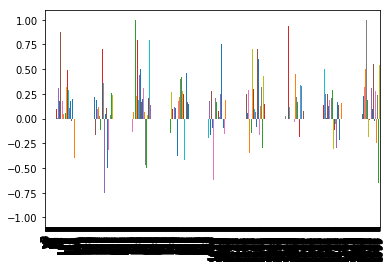

In [118]:
df['sentiment'].plot(kind='bar')

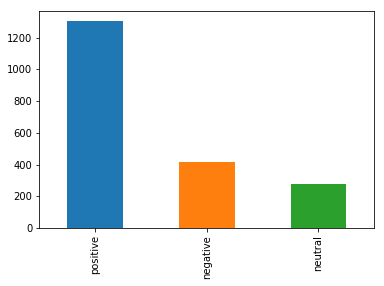

In [119]:
df['sentiment1'].value_counts().plot(kind='bar')

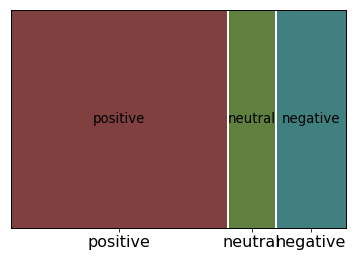

In [120]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df, ['sentiment1']);

Pulling the twitter data for analysis. till now we have used review data from Kaggle but as mentioned above we have also pulled some tweets since December. so we will pull all files, merge them and try to find the sentiment about iphonex

In [123]:
df0 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df1 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result1.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df2 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result2.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df3 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result3.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df4 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result4.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df5 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result5.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
#df6 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result6.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)
df7 = pd.read_csv('https://raw.githubusercontent.com/siwanian/PracticumData/master/result7.csv',names=['created','screenname','followers','favourites','text'], error_bad_lines=False)

In [124]:
dff = pd.concat([df0,df1,df2,df3,df4,df5,df7],ignore_index=True)

In [125]:
dff.head()

,created,screenname,followers,favourites,text
0,2018-12-25 23:59:16,HunterRamsey00,164,7039,b'RT @TrapHouseHitler: 13 year olds getting Ip...
1,2018-12-25 23:57:22,Ebkberto,179,1601,b'RT @TrapHouseHitler: 13 year olds getting Ip...
2,2018-12-25 23:57:01,forealstevejobs,757,6,"b""RT @SupplyChainBlog: VIDEO: What's in your A..."
3,2018-12-25 23:55:00,tim_murphy55,435,8875,b'RT @TrapHouseHitler: 13 year olds getting Ip...
4,2018-12-25 23:53:32,intercotinental,332,2393,b'RT @coolcam101: People trying to preorder th...


In [126]:
#Sentiment Analysis for iPhone X through model built above
twitter_positive = model.predict(vect.transform(dff))
print(twitter_positive)

[1 1 1 1 1]


In [127]:
comments_positivity.mean()

1.0

Tokenizing the words so we could see the frequency of everthing along with iphone x in a wordcloud

In [128]:
tweet_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in dff.text:
      # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens:
            tweet_words = tweet_words + words + ' '

Creating wordcloud

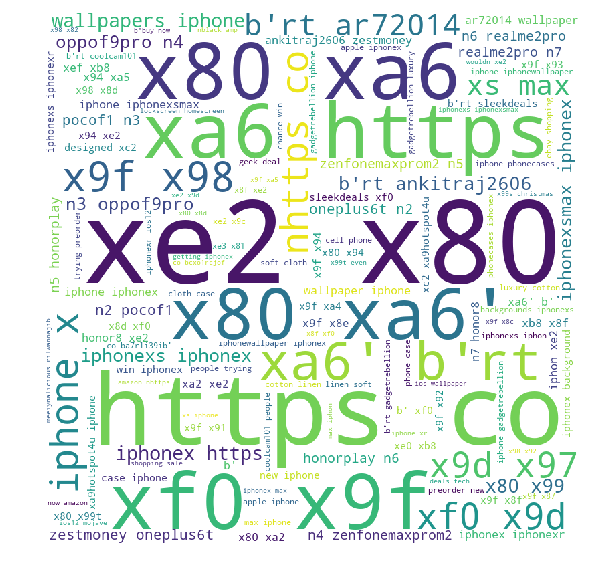

In [129]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tweet_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We can see through this word cloud that most of the space is covered by html tags and other things. we have not splitted the model data to exclude most frequent words so we do not lose some important information

In [141]:
from sklearn.decomposition import LatentDirichletAllocation,PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

Boiler place code for cleanup. Run this on twitter data and find how word cloud looks now

In [142]:
def cleanText(text):
    text = re.sub('[^ a-zA-Z]','',text)
    text = re.sub(r' +', ' ', text)
    return text

wnl = WordNetLemmatizer()
def lemmatizeSentences(data):
    count = 0
    for text in data:
        # clean the text
        text = cleanText(text)
        sentence = ""
        for i, j in pos_tag(word_tokenize(text)):
            word = ''
            if j[0].lower() in ['n', 'v', 'r']:
                word = wnl.lemmatize(i, j[0].lower())
            elif j[0].lower() is 'j':
                word = wnl.lemmatize(i, 'a')
            else:
                word = wnl.lemmatize(i)
            sentence = sentence + " " + word.lower()
        data[count] = sentence
        count = count + 1;

    return data

In [144]:
dff['clean'] = lemmatizeSentences(dff['text'])

dff['clean'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0     brt traphousehitler year old get iphonexxexxs...
1     brt traphousehitler year old get iphonexxexxs...
2     brt supplychainblog video whats in your apple...
3     brt traphousehitler year old get iphonexxexxs...
4     brt coolcam people try to preorder the new ip...
Name: clean, dtype: object

In [145]:
tweet_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in dff.clean:
      # typecaste each val to string 
        val = str(val) 
        # split the value 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens:
            tweet_words = tweet_words + words + ' '

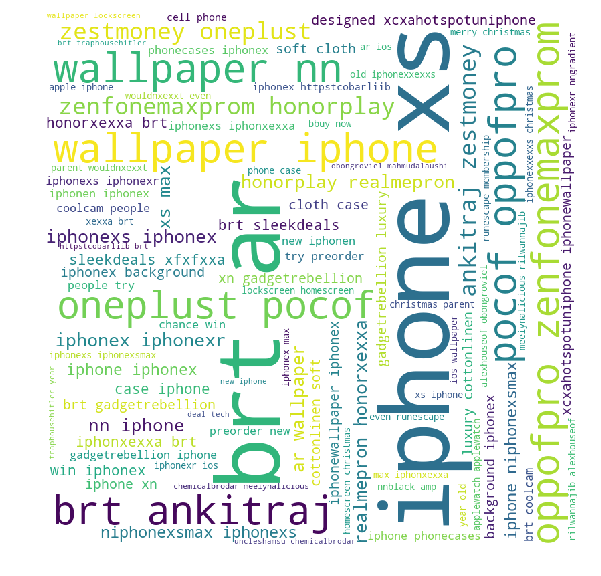

In [146]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tweet_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

After cleanup we can see that wordcloud provides us much more information than previous cloud. we will go with this data and use the sentiment

In [147]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment[0]
    except:
        return None

dff['sentiment'] = dff['clean'].apply(sentiment_calc)

In [148]:
dff.head()

,created,screenname,followers,favourites,text,clean,sentiment
0,2018-12-25 23:59:16,HunterRamsey00,164,7039,brt traphousehitler year old get iphonexxexxs...,brt traphousehitler year old get iphonexxexxs...,0.100000
1,2018-12-25 23:57:22,Ebkberto,179,1601,brt traphousehitler year old get iphonexxexxs...,brt traphousehitler year old get iphonexxexxs...,0.100000
2,2018-12-25 23:57:01,forealstevejobs,757,6,brt supplychainblog video whats in your apple...,brt supplychainblog video whats in your apple...,0.000000
3,2018-12-25 23:55:00,tim_murphy55,435,8875,brt traphousehitler year old get iphonexxexxs...,brt traphousehitler year old get iphonexxexxs...,0.100000
4,2018-12-25 23:53:32,intercotinental,332,2393,brt coolcam people try to preorder the new ip...,brt coolcam people try to preorder the new ip...,0.136364


In [149]:
def sentiment_type(i):
    try:
        if i > 0:
            return 'positive'
        elif i < 0:
            return 'negative'
        else:
            return 'neutral'
    except:
        return None

df['sentiment1'] = df['sentiment'].apply(sentiment_type)

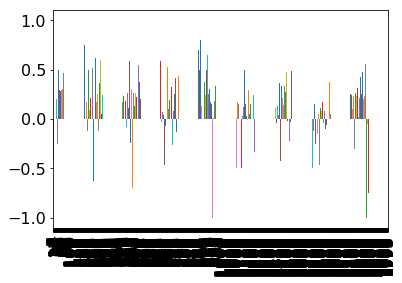

In [150]:
df['sentiment'].plot(kind='bar')

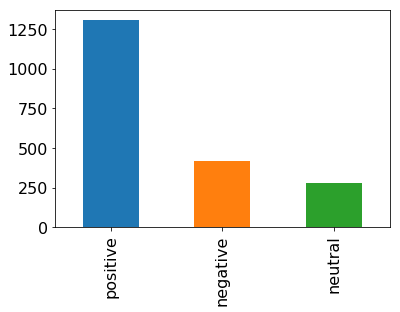

In [151]:
df['sentiment1'].value_counts().plot(kind='bar')

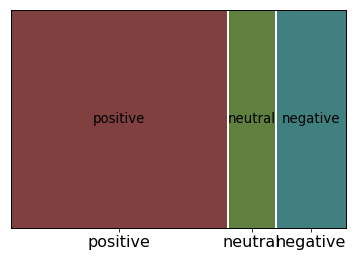

In [152]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(df, ['sentiment1']);